# Project: Investigate a Dataset - [Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This soccer database comes from
Kaggle and is well suited for data
analysis and machine learning. It
contains data for soccer matches,
players, and teams from several
European countries from 2008 to
2016.

### Dataset Description 

> ● The database is stored in a
SQLite database.


### Question(s) for Analysis
>Q1: Which leagues had scored the max number of goals ?

>Q2: Does playing in home increase the chances of winning?

>Q3: What team attributes lead to the most victories?

>Q4: Which players had the max OVR (overall rating)?

In [1]:
# Import statements for all of the packages that you plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.


### General Properties


Accessing our database using sqlite3 and pandas

In [2]:
# Load our data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.
conn = sqlite3.connect('database.sqlite')

df_country = pd.read_sql_query ('''SELECT*FROM Country''', conn)
df_league = pd.read_sql_query ('''SELECT*FROM League''', conn)
df_match = pd.read_sql_query ('''SELECT*FROM Match''', conn)
df_player = pd.read_sql_query ('''SELECT*FROM Player''', conn)
df_p_att = pd.read_sql_query ('''SELECT*FROM Player_Attributes''', conn)
df_team = pd.read_sql_query ('''SELECT*FROM Team''', conn)
df_t_att = pd.read_sql_query ('''SELECT*FROM Team_Attributes''', conn)

In [3]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [4]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [5]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [6]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [7]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [8]:
df_match.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    id                25979 non-null  int64  
 1    country_id        25979 non-null  int64  
 2    league_id         25979 non-null  int64  
 3    season            25979 non-null  object 
 4    stage             25979 non-null  int64  
 5    date              25979 non-null  object 
 6    match_api_id      25979 non-null  int64  
 7    home_team_api_id  25979 non-null  int64  
 8    away_team_api_id  25979 non-null  int64  
 9    home_team_goal    25979 non-null  int64  
 10   away_team_goal    25979 non-null  int64  
 11   home_player_X1    24158 non-null  float64
 12   home_player_X2    24158 non-null  float64
 13   home_player_X3    24147 non-null  float64
 14   home_player_X4    24147 non-null  float64
 15   home_player_X5    24147 non-null  float64
 16   home_player_X6    24

In [9]:
df_player.info(), df_player.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


(None, (11060, 7))

In [10]:
df_player.duplicated().sum()

0

In [11]:
df_p_att.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [12]:
df_p_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [13]:
df_p_att.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [14]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [15]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [16]:
df_team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [17]:
df_team.duplicated().sum()

0

In [18]:
df_t_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [19]:
df_t_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [20]:
df_t_att.duplicated().sum()

0

In [21]:
df_p_att.duplicated().sum()

0

In [22]:
df_match.duplicated().sum()

0


### Data Cleaning
> 
 

Remove all unnessesry columns from match dataframe

In [23]:
df_match.drop(df_match.iloc[:,11:], inplace=True, axis=1)

In [24]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


Due to alot of missing data at Team_Attributes table for 'buildUpPlayDribbling' column. Therefore, it might be safer to just drop this column all in all.

In [25]:
df_t_att.drop(columns=['buildUpPlayDribbling'], inplace=True)

In [26]:
df_t_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              1458 non-null   int64 
 1   team_fifa_api_id                1458 non-null   int64 
 2   team_api_id                     1458 non-null   int64 
 3   date                            1458 non-null   object
 4   buildUpPlaySpeed                1458 non-null   int64 
 5   buildUpPlaySpeedClass           1458 non-null   object
 6   buildUpPlayDribblingClass       1458 non-null   object
 7   buildUpPlayPassing              1458 non-null   int64 
 8   buildUpPlayPassingClass         1458 non-null   object
 9   buildUpPlayPositioningClass     1458 non-null   object
 10  chanceCreationPassing           1458 non-null   int64 
 11  chanceCreationPassingClass      1458 non-null   object
 12  chanceCreationCrossing          1458 non-null   

Convert date column type for match,player_att & team_att tables and birthday for player table

In [27]:
df_match['date'] = pd.to_datetime(df_match['date'])
df_p_att['date'] = pd.to_datetime(df_p_att['date'])
df_t_att['date'] = pd.to_datetime(df_t_att['date'])
df_player['birthday'] = pd.to_datetime(df_player['birthday'])

Merge dataframe to make it easy to our analysis

In [28]:
df_team.drop(columns=['id','team_fifa_api_id','team_short_name'], inplace=True)

In [29]:
df_merge1 =pd.merge(df_league, df_match, how='outer', on='country_id')
df_merge2 = pd.merge(df_merge1,df_team,left_on = 'home_team_api_id',right_on = 'team_api_id')
match_merge = pd.merge(df_merge2,df_team,left_on = 'away_team_api_id',right_on = 'team_api_id')
match_merge.sample(5)

,id_x,country_id,name,id_y,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id_x,team_long_name_x,team_api_id_y,team_long_name_y
17999,17642,17642,Portugal Liga ZON Sagres,17858,17642,2008/2009,7,2008-11-02,509177,7844,9772,1,2,7844,Vitória Guimarães,9772,SL Benfica
18521,17642,17642,Portugal Liga ZON Sagres,18785,17642,2012/2013,3,2012-09-02,1256276,9764,10238,0,0,9764,Gil Vicente FC,10238,Vitória Setúbal
25464,24558,24558,Switzerland Super League,25508,24558,2013/2014,21,2014-02-15,1471880,10199,9930,3,2,10199,FC Luzern,9930,FC Aarau
19606,17642,17642,Portugal Liga ZON Sagres,18128,17642,2010/2011,1,2010-08-14,859651,9809,9773,0,1,9809,Naval 1° de Maio,9773,FC Porto
10300,10257,10257,Italy Serie A,11673,10257,2011/2012,36,2012-05-02,1083167,8543,8551,1,1,8543,Lazio,8551,Siena


In [30]:
match_merge.rename(columns={'name':'league_name', 'team_long_name_x':'home_team_name', 'team_long_name_y':'away_team_name'}, inplace=True)

In [31]:
match_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_x              25979 non-null  int64         
 1   country_id        25979 non-null  int64         
 2   league_name       25979 non-null  object        
 3   id_y              25979 non-null  int64         
 4   league_id         25979 non-null  int64         
 5   season            25979 non-null  object        
 6   stage             25979 non-null  int64         
 7   date              25979 non-null  datetime64[ns]
 8   match_api_id      25979 non-null  int64         
 9   home_team_api_id  25979 non-null  int64         
 10  away_team_api_id  25979 non-null  int64         
 11  home_team_goal    25979 non-null  int64         
 12  away_team_goal    25979 non-null  int64         
 13  team_api_id_x     25979 non-null  int64         
 14  home_team_name    2597

Text(0, 0.5, 'Number of goals')

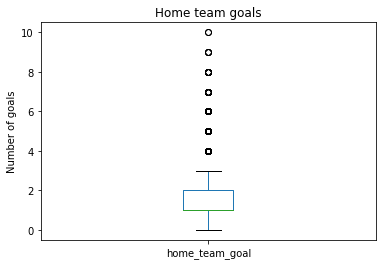

In [32]:
match_merge['home_team_goal'].plot(kind='box')
plt.title('Home team goals')
plt.ylabel('Number of goals')

Text(0, 0.5, 'Number of goals')

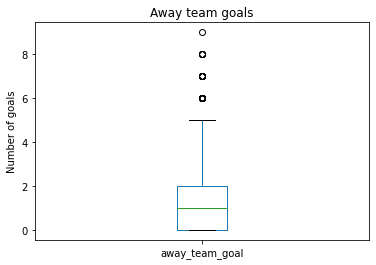

In [33]:
match_merge['away_team_goal'].plot(kind='box')
plt.title('Away team goals')
plt.ylabel('Number of goals')

In [34]:
team_merge = pd.merge(df_team, df_t_att, how='outer', on='team_api_id')
team_merge.head(0)

,team_api_id,team_long_name,id,team_fifa_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass


In [35]:
player_merge = pd.merge(df_player, df_p_att, how='outer', on='player_api_id')
player_merge.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1,218353,2016-02-18,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2,218353,2015-11-19,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,3,218353,2015-09-21,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,4,218353,2015-03-20,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,5,218353,2007-02-22,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1  Which leagues had scored the max number of goals ?

In [36]:
home_goals = match_merge.groupby('league_name').home_team_goal.sum()
away_goals = match_merge.groupby('league_name').away_team_goal.sum()
total_goals = home_goals + away_goals
total_goals.sort_values(ascending = False)

league_name
Spain LIGA BBVA             8412
England Premier League      8240
Italy Serie A               7895
Netherlands Eredivisie      7542
France Ligue 1              7427
Germany 1. Bundesliga       7103
Portugal Liga ZON Sagres    5201
Belgium Jupiler League      4841
Scotland Premier League     4804
Poland Ekstraklasa          4656
Switzerland Super League    4166
dtype: int64

In [37]:
top_leagues = pd.DataFrame(total_goals.sort_values(ascending = False)).reset_index(level=0)
top_leagues.columns = ['League','Goals']

Text(0, 0.5, 'Top 5 leagues')

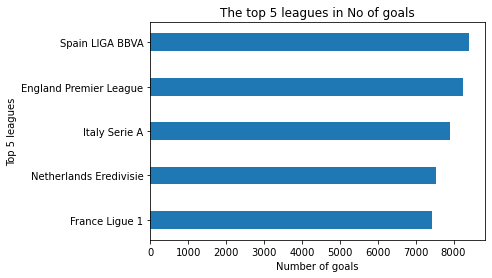

In [38]:
top_leagues.iloc[:5].plot.barh(x='League',y = 'Goals',width = 0.4, legend = None).invert_yaxis()
plt.title('The top 5 leagues in No of goals')
plt.xlabel('Number of goals')
plt.ylabel('Top 5 leagues')

In [39]:
top_leagues.describe()

,Goals
count,11.000000
mean,6389.727273
std,1642.202794
min,4166.000000
25%,4822.500000
50%,7103.000000
75%,7718.500000
max,8412.000000


The figure show that the Spain liga is the top league in goal scored

### Research Question 2 Does playing in home increase the chances of winning?

In [40]:
number_of_homeTeam_wins=(match_merge['home_team_goal']>match_merge['away_team_goal']).sum()
number_of_homeTeam_wins

11917

In [41]:
number_of_draw_match=(match_merge['home_team_goal']==match_merge['away_team_goal']).sum()
number_of_draw_match

6596

In [42]:
number_of_awayTeam_wins=(match_merge['away_team_goal']>match_merge['home_team_goal']).sum()
number_of_awayTeam_wins

7466

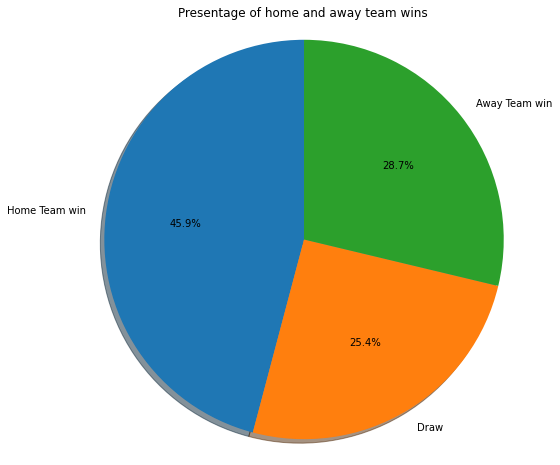

In [43]:
data = np.array([1,2,3],dtype=int) 
data[0] = number_of_homeTeam_wins
data[1] = number_of_draw_match
data[2] = number_of_awayTeam_wins

labels = 'Home Team win', 'Draw', 'Away Team win'
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Presentage of home and away team wins')
plt.show()

We can see that most of the winning teams are home teams.

### Research Question 3: What team attributes lead to the most victories?

In [44]:
def winner(g):
    if g['home_team_goal'] > g['away_team_goal']:
        return g['home_team_name']
    elif g['home_team_goal'] < g['away_team_goal']:
        return g['away_team_name']
    else:
        return 'Draw'

match_merge['Winner'] = match_merge.apply(winner, axis=1)

In [45]:
match_merge['Winner'].value_counts()

Draw                     6596
FC Barcelona              234
Real Madrid CF            228
Celtic                    218
FC Bayern Munich          193
                         ... 
FC Dordrecht                4
SpVgg Greuther Fürth        4
DSC Arminia Bielefeld       4
AC Arles-Avignon            3
Córdoba CF                  3
Name: Winner, Length: 297, dtype: int64

Due to our analysis we find that 'FC Barcelona' is the most victories team.

In [46]:
top_winner=match_merge['Winner'].value_counts()[1:2].index.tolist()
top_winner

['FC Barcelona']

In [47]:
top_team= pd.DataFrame(team_merge[team_merge['team_long_name'].isin(top_winner)])

Text(0, 0.5, 'values')

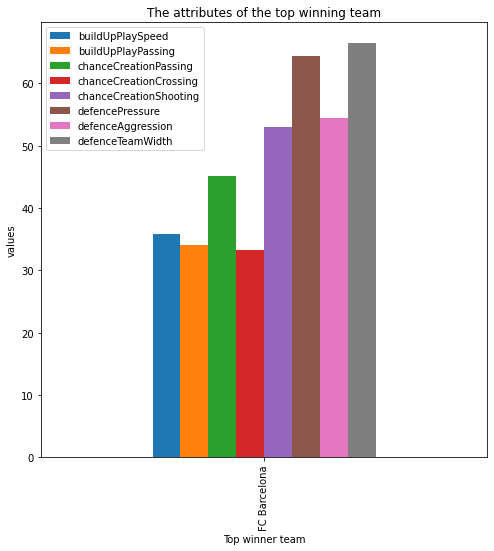

In [48]:
top_team.groupby(by = "team_long_name").mean()[['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing', 'chanceCreationShooting','defencePressure', 'defenceAggression', 'defenceTeamWidth']].plot(kind = "bar",figsize=(8,8))
plt.title('The attributes of the top winning team')
plt.xlabel('Top winner team')
plt.ylabel('values')

According to our analysis and figure show that the team attributes lead to the most victories in 

Defense situations ('defenceTeamWidth','defencePressure', 'defenceAggression') and in

Attack situations ('chanceCreationShooting', 'chanceCreationPassing')

In [49]:
df_t_att.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


### Research Question 4: Which players had the max OVR (overall rating) ?

In [50]:
top_players = pd.DataFrame(player_merge.groupby('player_name').overall_rating.mean()).reset_index(level=0)

In [51]:
top_players = top_players.sort_values(by='overall_rating',ascending = False)
top_players.head(10)

,player_name,overall_rating
6053,Lionel Messi,92.192308
1958,Cristiano Ronaldo,91.280000
3438,Franck Ribery,88.458333
723,Andres Iniesta,88.320000
10827,Zlatan Ibrahimovic,88.285714
929,Arjen Robben,87.840000
10634,Xavi Hernandez,87.636364
10524,Wayne Rooney,87.222222
4281,Iker Casillas,86.954545
8422,Philipp Lahm,86.733333


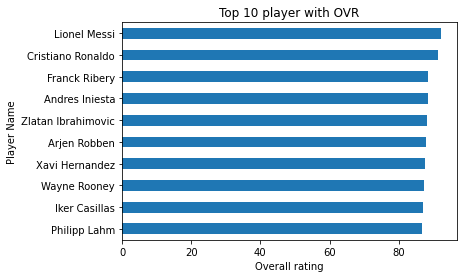

In [52]:
top_players.columns = ['player_name','overall_rating']
top_players.iloc[:10].plot.barh(x='player_name',y='overall_rating',legend = None).invert_yaxis()

plt.title('Top 10 player with OVR')
plt.xlabel('Overall rating')
plt.ylabel('Player Name')
plt.show()

We can see that the max players in Overall rating is {Messi, Ronaldo, Ribery, Iniesta & Ibrahimovic} respectively.

In [53]:
top_players.describe()

,overall_rating
count,10848.000000
mean,66.797845
std,6.226819
min,43.000000
25%,62.800000
50%,66.705882
75%,70.916667
max,92.192308


<a id='conclusions'></a>
## Conclusions

>  Finally, summarize your findings and the results that have been performed in relation to the questions provided at the beginning of the analysis. we found that Spain liga is the most league in number of goals scored , FC Barchalona is the most victories team , Lionel Messi is the max overall rating player and  We can see that most of the winning teams are home teams.

>We figured that the top winning team has attributes of defenceTeamWidth, defenceAggression, defencePrressure, and chanceCreation shooting, all of which might be feature that correlate with the team's success.


### Limitations

> The dataset was needed alot of cleaning to answer some questions.

>Some dataset like match table size is not sufficient to give a good judgement so I drop some unnecessary columns to make a good judgement.

>The major difficulties I encountered in the dataset while performing the analysis dealing with sql Database.

>Dropping lines from the dataset was an issue affecting accuracy of the analysis like in match table and player att. table.


In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])